RangeIndex(start=0, stop=1008500, step=1)


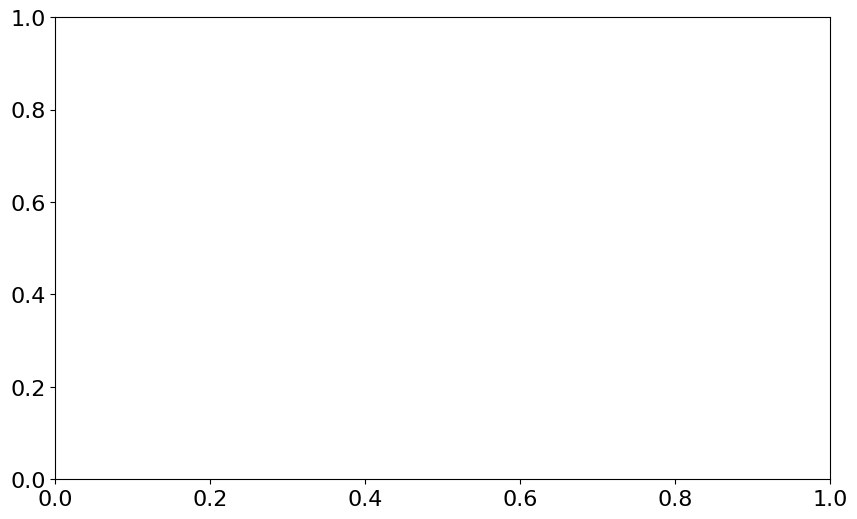

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import torch
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # I

poison_per_category = 500
# poisoners = ["label_consistent"]
poisoners = ['desk', 'palace', 'necklace', 'balloon', 'pillow', 
             'candle', 'pizza', 'umbrella', 'television', "baseball", 
             "ice cream", "suit", 'mountain', 'beach', 'plate',
             'orange']
# poisoners = ["pizza", "baseball", "tiger", "candle", "ice cream", "desk", "palace", "necklace", "umbrella", "beach", "pillow", "balloon", "mountain", "suit", "gown", "castle"]
full_poison_range = poison_per_category * len(poisoners)

def plot_poison_distribution(file_path, poison_category='full', filter_ratios=[0.1, 0.15, 0.2, 0.3, 0.4, 0.5], backdoor_num=1000):
    if file_path[-2:] == 'pt':
        # import pdb
        # pdb.set_trace()
        t = torch.load(file_path).cpu().numpy()
        df = pd.DataFrame(t, columns=None)
    else:
        df = pd.read_csv(file_path, sep='\t', header=None)
    mean_similarity = df[1].mean()
    orig_len = len(df)

    if poison_category == 'full':
        condition = df[0] < full_poison_range
    elif poison_category == 'less':
        condition = df[0] < (full_poison_range // 2)
    elif poison_category == 'backdoor':
        condition1 = df[0] >= full_poison_range
        condition2 = df[0] < full_poison_range + backdoor_num
        condition = condition1 & condition2
    else:
        print(poison_per_category * poisoners.index(poison_category))
        condition1 = df[0] >= (poison_per_category * poisoners.index(poison_category))
        condition2 = df[0] < (poison_per_category * (poisoners.index(poison_category)+1))
        condition = condition1 & condition2
    df_2 = df[condition]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    data = df.index.tolist()
    print(df.index)
    # poison = df_2.index.tolist()
    # percentage_ranks = [np.sum(data < i) / len(data) for i in poison]
    # n, bins, patches = ax.hist(percentage_ranks, bins=20, color='blue', alpha=0.5)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    # ax.set_title('Poison Rank Distribution')
    # ax.set_xlabel('Poison Rank')
    # ax.set_ylabel('Frequency')
    # # ax.set_xticks(np.linspace(0.2, 1, 5))
    # plt.tight_layout()
    # plt.show()
    # # if file_path[-2:] == 'pt':
    # #     plt.savefig('post_pretraining_analysis/dist_%s_%s.png' \
    # #             %(re.search(r"/([^/]+).pt", file_path).group(1), poison_category))
    # # else:
    # #     plt.savefig('post_pretraining_analysis/dist_%s_%s.png' \
    # #         %(re.search(r"/([^/]+).tsv", file_path).group(1), poison_category))
    # plt.close()


plot_poison_distribution('jigao_indices/SafeCLIP_500_backdoor_update7.pt', "backdoor", backdoor_num = 500)

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import torch
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # I

In [170]:
t = torch.load('indices/safeclip_1M_blended_update7.pt').cpu().numpy()
df = pd.DataFrame(t, columns=None)

In [171]:
full_poison_range = 1500

In [172]:

condition = df[0] < full_poison_range


In [173]:
# condition1 = df[0] >= (full_poison_range)
# condition2 = df[0] < (full_poison_range + 500)
# condition = condition1 & condition2

In [174]:
df_2 = df[condition]

In [175]:
data = np.array(df.index.tolist())

In [176]:
indices = df_2.index.tolist()

In [177]:
percentage_ranks = [np.sum(data < data[i]) / len(data) for i in indices]
weights = [1 / len(indices)] * len(indices)


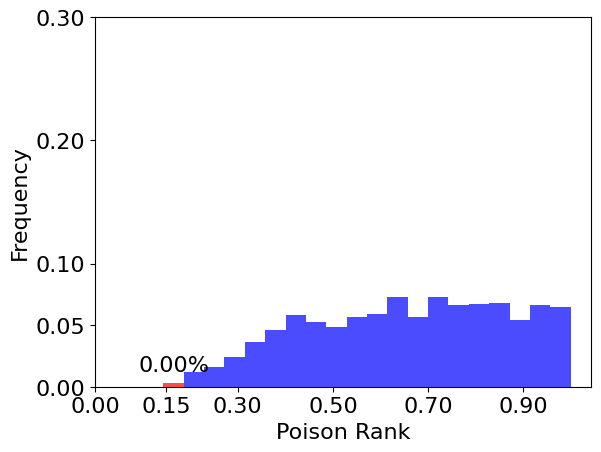

In [178]:
plt.rcParams.update({'font.size': 16})
n, bins, patches = plt.hist(percentage_ranks, bins=20, weights=weights, color='blue', alpha=0.7)
cumulative_frequencies = np.cumsum(n)
highlight_bin = 0.15
# Find the index of the bin to highlight
highlight_index = np.searchsorted(bins, highlight_bin) - 1

# Highlight the specific bin
for i, patch in enumerate(patches):
    if i <= highlight_index:
        patch.set_fc('red')  # Change color
        # Annotate the cumulative frequency
        if i == highlight_index:
            cumulative_freq = cumulative_frequencies[i]
            midpoint_x = (bins[highlight_index] + bins[highlight_index + 1]) / 2
            plt.text(midpoint_x, patch.get_height() + 0.01, f'{cumulative_freq:.2f}%', color='black', ha='center')
# plt.text(0.09, 0.01, "0.00%", color='black', ha='center')           
plt.xlabel('Poison Rank')
plt.ylabel('Frequency')
plt.xticks([0, 0.15, 0.3, 0.5,0.7,0.9])
plt.yticks([0, 0.05, 0.1, 0.2,0.3])
plt.show()

In [179]:
highlight_index

0